# DAY8

## 字典的简单介绍

可以去b站找个视频 或者 csdn找个帖子看下字典的简单介绍----锻炼下自学能力

但是目前我们只会用到映射这个用法，他需要传入的是字典，因为字典的键值对，键是唯一的，值可以重复。这很符合数据的特征是固定的，但是值可以变化这个特性。

所以后续想完成新的映射，直接修改字典的键值对即可。

In [46]:
# 使用花括号创建字典
dict = {'name': 'Alice', 'age': 25, 'city': 'New York'}

dict

{'name': 'Alice', 'age': 25, 'city': 'New York'}

In [47]:
dict['name']  # 访问字典中的值

'Alice'

## 标签编码

之前介绍了离散数据 如果是不存在顺序，则采用独热编码，函数为pd.get_dummies()

现在介绍对于存在顺序和大小关系的离散特征，做好标签编码,借助dataframe的map函数即可实现

In [48]:

import pandas as pd
data = pd.read_csv('data\data.csv')

In [49]:
data.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


这里我们给Home Oweners来完成标签编码，实际上这个特征也可以独热编码，取决于你的理解。实际中，都试一下 ，谁训练出来的模型好选谁。

In [50]:
data["Home Ownership"].value_counts()

Home Ownership
Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: count, dtype: int64

- 住房抵押贷款：3637   这个是有房贷，有房子
- 租房：3204     没房子
- 拥有自有住房：647    这个没贷款，有房子
- 有贷款：12   这个是有其他贷款，有房子，没房贷
- 名称：房屋所有权，数据类型：int64

上面这些翻译也不一定对，这是我个人对数据的理解。

按照贷款严重程度（抗风险能力），依次是：自有住房 ＜ 租房 ＜ 有其他贷款 ＜ 住房抵押贷款

所以按照这个逻辑来进行编码

In [51]:
# 定义映射字典
mapping = {
        "Own Home": 1,
        "Rent": 0,
        "Have Mortgage ": 2,
        "Home Mortgage": 3
    
}
data["Home Ownership"].head()

0         Own Home
1         Own Home
2    Home Mortgage
3         Own Home
4             Rent
Name: Home Ownership, dtype: object

In [52]:
data["Home Ownership"] = data["Home Ownership"].map(mapping)
data["Home Ownership"].head()

0    1.0
1    1.0
2    3.0
3    1.0
4    0.0
Name: Home Ownership, dtype: float64

In [53]:
data["Term"].value_counts()

Term
Short Term    5556
Long Term     1944
Name: count, dtype: int64

对于字符串类型 我们也要映射成整数类型，这里不要理解为标签编码或者独热编码

我们在复试班说过，二分类的问题不需要独热编码，比如性别这个特征，男女不需要变成2个特征，性别男 性别女 。因为他们二者自由度为1，如果是2个特征的话，性别男=1，那么性别女必定等于0.这样特征高度相关，没有价值。

此时这个特征的含义不是性别，而是：是否为男性，1是男性，0是非男。

三分类以上才涉及独热编码


In [54]:
# 定义映射字典
mapping = {
    "Short Term": 1,
    "Long Term": 0
}

# 进行映射
data["Term"] = data["Term"].map(mapping)
data["Term"].head()

0    1
1    0
2    1
3    1
4    1
Name: Term, dtype: int64

实际上借助一个映射函数也可以实现上面2次编码

字典的键值对可以嵌套字典

In [55]:
import pandas as pd

# 重新读取数据
data = pd.read_csv("data\data.csv")
# 嵌套映射字典
mapping = {
    "Term": {
        "Short Term": 1,
        "Long Term": 0
    },
    "Home Ownership": {
        "Rent": 0,
        "Own Home": 1,
        "Have Mortgage  ": 2,
        "Home Mortgage": 3
    }
}


In [56]:
mapping["Term"] # 访问嵌套字典中的值，此时他又是一个字典

{'Short Term': 1, 'Long Term': 0}

In [57]:
# 对 Home Ownership 列进行映射
data["Home Ownership"] = data["Home Ownership"].map(mapping["Home Ownership"])

# 对 Term 列进行映射
data["Term"] = data["Term"].map(mapping["Term"])

data.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,1.0,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,1,99999999.0,47386.0,7914.0,749.0,0
1,1,1.0,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,0,264968.0,394972.0,18373.0,737.0,1
2,2,3.0,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,1,99999999.0,308389.0,13651.0,742.0,0
3,3,1.0,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,1,121396.0,95855.0,11338.0,694.0,0
4,4,0.0,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,1,125840.0,93309.0,7180.0,719.0,0


# 连续变量的处理

归一化和标准化可以通过手写函数实现，也可以使用sklearn中的归一化和标准化函数。

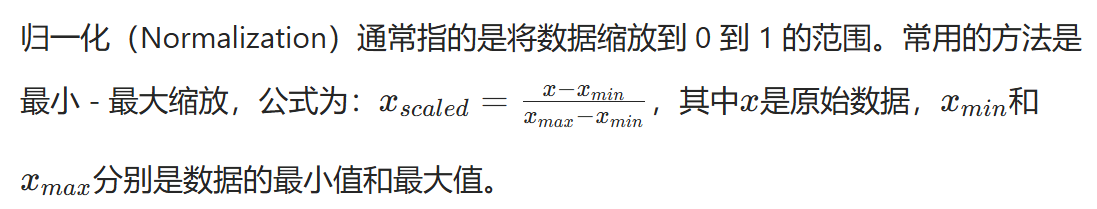

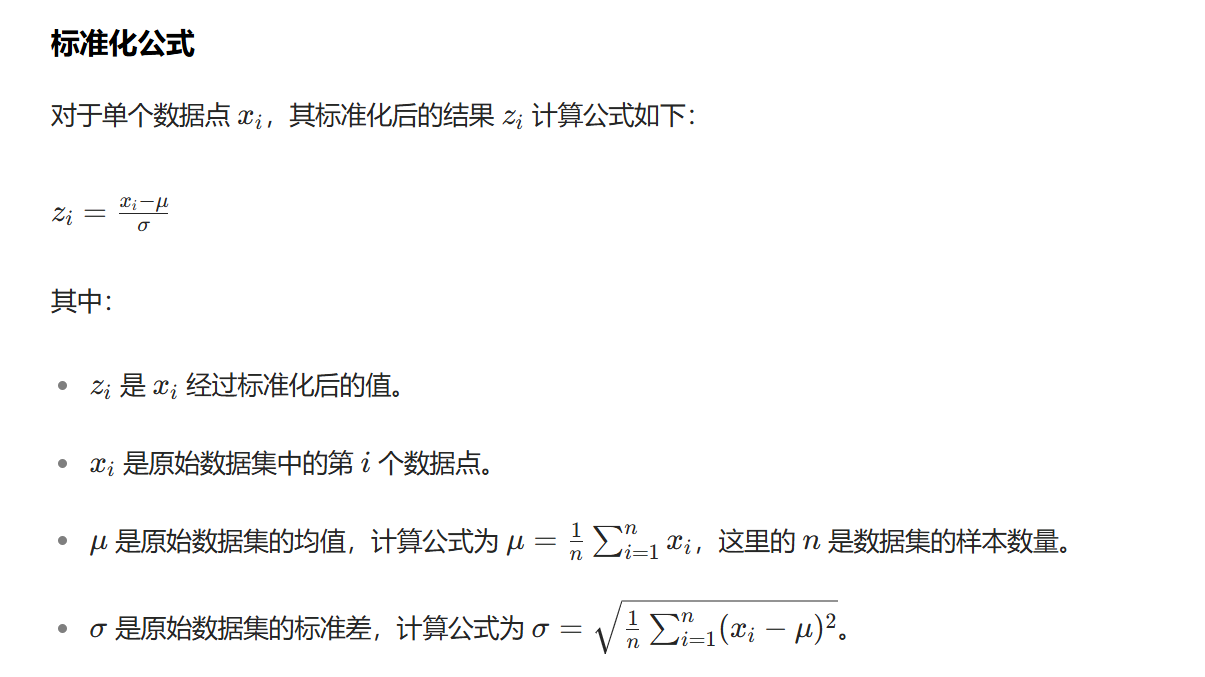

In [58]:
# 对Annual Income列做归一化，手动构建函数实现
# 自行学习下如何创建函数，这个很简单很常用
def manual_normalize(data):
    """
    此函数用于对输入的数据进行归一化处理
    :param data: 输入的一维数据（如 Pandas 的 Series）
    :return: 归一化后的数据
    """
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data
data['Annual Income'] = manual_normalize(data['Annual Income'])
data['Annual Income'].head()


0    0.031798
1    0.086221
2    0.058771
3    0.064145
4    0.061260
Name: Annual Income, dtype: float64

In [59]:
# 借助sklearn库进行归一化处理

from sklearn.preprocessing import StandardScaler, MinMaxScaler
data = pd.read_csv("data\data.csv")# 重新读取数据


# 归一化处理
min_max_scaler = MinMaxScaler() # 实例化 MinMaxScaler类，之前课上也说了如果采取这种导入函数的方式，不需要申明库名
data['Annual Income'] = min_max_scaler.fit_transform(data[['Annual Income']])

data['Annual Income'].head()


0    0.031798
1    0.086221
2    0.058771
3    0.064145
4    0.061260
Name: Annual Income, dtype: float64

In [60]:
# 标准化处理
data = pd.read_csv("data\data.csv")# 重新读取数据
scaler = StandardScaler() # 实例化 StandardScaler，
data['Annual Income'] = scaler.fit_transform(data[['Annual Income']])
data['Annual Income'].head()

    

0   -1.046183
1   -0.403310
2   -0.727556
3   -0.664078
4   -0.698155
Name: Annual Income, dtype: float64